In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on = "city")
# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [41]:
by_city = city_ride_data.groupby(city_ride_data["city"])
by_city.mean()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Barronchester,36.422500,4.460796e+12,11.0
Bethanyland,32.956111,5.842550e+12,22.0
Bradshawfurt,40.064000,3.735294e+12,7.0
Brandonfort,35.437368,5.429539e+12,10.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Colemanland,30.894545,5.155714e+12,23.0


## Bubble Plot of Ride Sharing Data

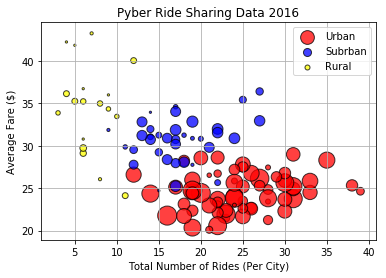

In [117]:
# Obtain the x and y coordinates for each of the three city types

# Urban
urban_data = city_ride_data.loc[city_ride_data["type"] == "Urban", :] 
urban_by_city = urban_data.groupby(urban_data["city"])
avg_fare_urb = urban_by_city["fare"].mean()
rides_urb = urban_data["city"].value_counts()
drivers_urb = urban_by_city["driver_count"].mean()


# Suburban
sub_data = city_ride_data.loc[city_ride_data["type"] == "Suburban", :] 
sub_by_city = sub_data.groupby(sub_data["city"])
avg_fare_sub = sub_by_city["fare"].mean()
rides_sub = sub_data["city"].value_counts()
drivers_sub = sub_by_city["driver_count"].mean()

# Rural
rural_data = city_ride_data.loc[city_ride_data["type"] == "Rural", :] 
rural_by_city = rural_data.groupby(rural_data["city"])
avg_fare_rur = rural_by_city["fare"].mean()
rides_rur = rural_data["city"].value_counts()
drivers_rural = rural_by_city["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(rides_urb, avg_fare_urb, marker = 'o', facecolors = "red", 
            edgecolors = "black", s = drivers_urb * 5, alpha = 0.75)
plt.scatter(rides_sub, avg_fare_sub, marker = 'o', facecolors = "blue", 
            edgecolors = "black", s = drivers_sub * 5, alpha = 0.75)
plt.scatter(rides_rur, avg_fare_rur, marker = 'o', facecolors = "yellow", 
            edgecolors = "black", s = drivers_rural * 5, alpha = 0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(['Urban','Subrban', 'Rural'])
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Pyber")
plt.show()

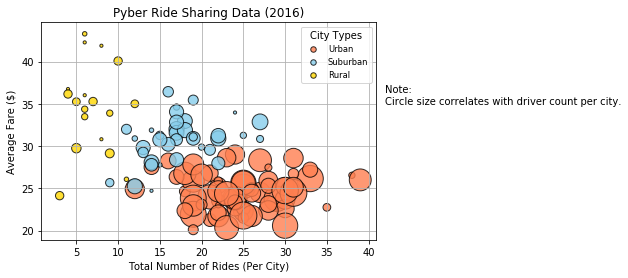

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

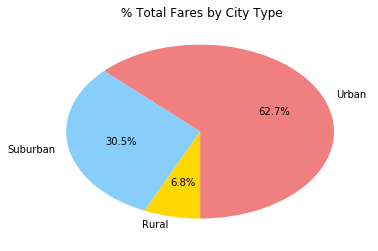

In [120]:
# Calculate Type Percents
tf_urb = urban_data["fare"].sum()
tf_sub = sub_data["fare"].sum()
tf_rur = rural_data["fare"].sum()
tf = tf_urb + tf_sub + tf_rur
fp_urb = (tf_urb / tf) * 100
fp_sub = (tf_sub / tf) * 100
fp_rur = (tf_rur / tf) * 100

# Build Pie Chart
city_types = ['Urban', 'Suburban', 'Rural']
fares_by_city = [fp_urb, fp_sub, fp_rur]
colors = ["LightCoral", "LightSkyBlue", "Gold"]
plt.pie(fares_by_city, labels = city_types, autopct="%1.1f%%", colors = colors,
        startangle = -90)
plt.title(" % Total Fares by City Type")

# Save Figure
plt.savefig("%_Total_Fares_by_City_Type")
plt.show()

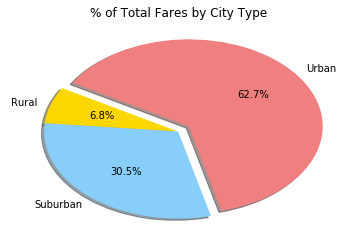

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

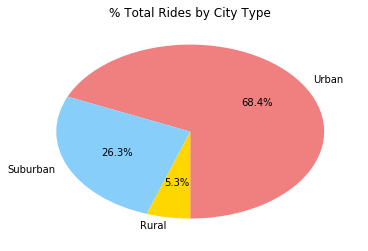

In [121]:
# Calculate Ride Percents
tr_urb = urban_data["ride_id"].count()
tr_sub = sub_data["ride_id"].count()
tr_rur = rural_data["ride_id"].count()
tr = tr_urb + tr_sub + tr_rur
rp_urb = (tr_urb / tr) * 100
rp_sub = (tr_sub / tr) * 100
rp_rur = (tr_rur / tr) * 100

# Build Pie Chart
rides_by_city = [rp_urb, rp_sub, rp_rur]
plt.pie(rides_by_city, labels = city_types, autopct="%1.1f%%", colors =colors,
        startangle = -90)
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("%_Total_Rides_by_City_Type")
plt.show()

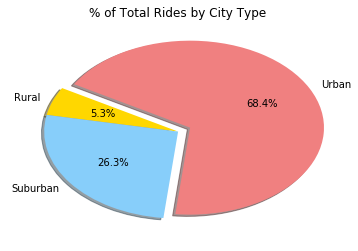

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

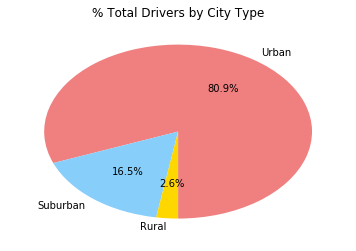

In [122]:
# Calculate Driver Percents
td_urb = drivers_urb.sum()
td_sub = drivers_sub.sum()
td_rur = drivers_rural.sum()
td = td_urb + td_sub + td_rur
dp_urb = (td_urb / td) * 100
dp_sub = (td_sub / td) * 100
dp_rur = (td_rur / td) * 100

# Build Pie Charts
drivers_by_city = [dp_urb, dp_sub, dp_rur]
plt.pie(drivers_by_city, labels = city_types, autopct="%1.1f%%", colors = colors,
        startangle = -90)
plt.title("% Total Drivers by City Type")

# Save Figure
plt.savefig("%_Total_Drivers_by_City_Type")
plt.show()

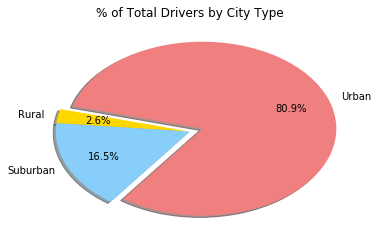

In [6]:
# Show Figure
plt.show()